# Breast Cancer Detection using Logistic Regression

In [33]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [34]:

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [35]:
print("Dataset shape:", X.shape)
print("Target classes:", data.target_names)

Dataset shape: (569, 30)
Target classes: ['malignant' 'benign']


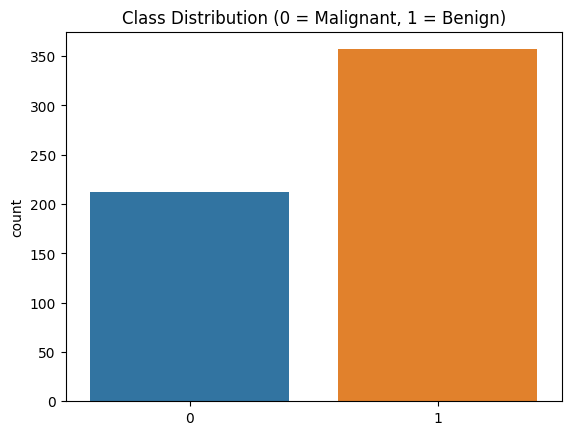

In [36]:
# Exploratory Data Analysis
sns.countplot(x=y)
plt.title("Class Distribution (0 = Malignant, 1 = Benign)")
plt.show()

In [37]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# warnings.filterwarnings("ignore")

In [38]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [40]:
# Predictions
y_pred = model.predict(X_test_scaled)


Logistic Regression
Accuracy: 0.9824561403508771


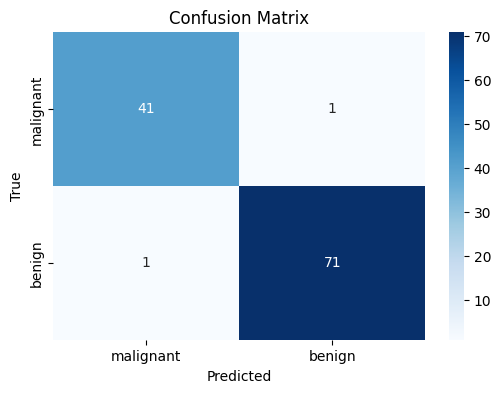

Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [41]:
# Evaluation
acc = accuracy_score(y_test, y_pred)
print("\nLogistic Regression")
print("Accuracy:", acc)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))


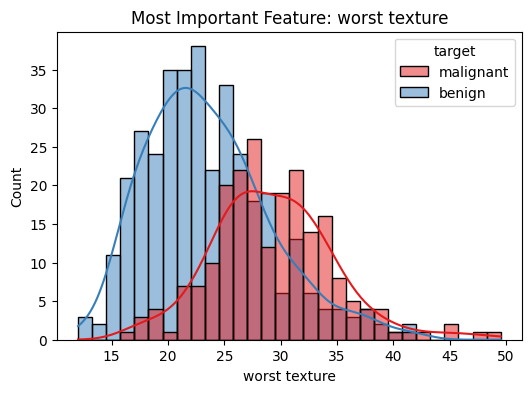

In [42]:
# Combine the most important feature with the target
df_plot = pd.DataFrame({
    top_feature: X[top_feature],
    "target": y.replace({0: "malignant", 1: "benign"})
})

# Plot distribution of the most important feature by class
plt.figure(figsize=(6,4))
sns.histplot(data=df_plot, x=top_feature, hue="target", bins=30, kde=True, palette="Set1")
plt.title(f"Most Important Feature: {top_feature}")
plt.xlabel(top_feature)
plt.ylabel("Count")
plt.show()

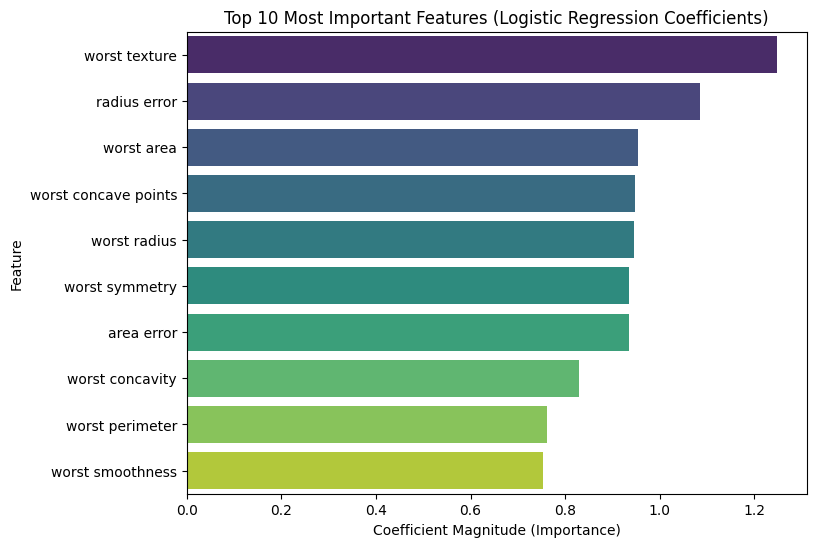

In [44]:
# Get feature importance (coefficients from logistic regression)
feature_importance = pd.Series(model.coef_[0], index=data.feature_names)

# Sort features by absolute importance
sorted_features = feature_importance.abs().sort_values(ascending=False)

# Choose top-k features
k = 10  # you can change this to any number you want
top_k_features = sorted_features.head(k)

# Plot top-k feature importance
plt.figure(figsize=(8,6))
sns.barplot(x=top_k_features.values, y=top_k_features.index, palette="viridis")
plt.title(f"Top {k} Most Important Features (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Magnitude (Importance)")
plt.ylabel("Feature")
plt.show()


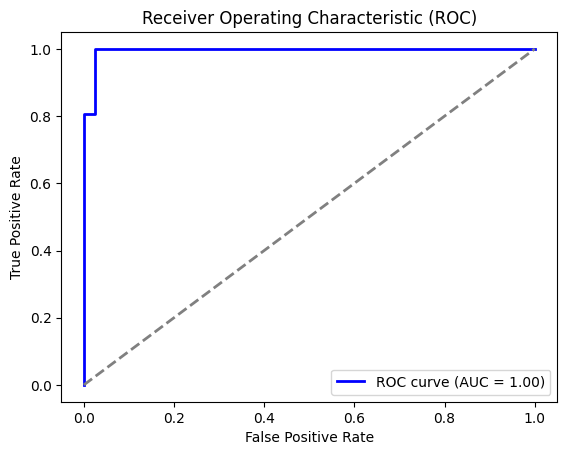

In [43]:
# ROC Curve
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
